# Classification Example

In [47]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

X = load_wine().data
y = load_wine().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
ohe = LabelEncoder().fit(y_train)
y_train = ohe.transform(y_train)
y_test_t = ohe.transform(y_test)
y_train_t = np_utils.to_categorical(y_train)
y_test_t = np_utils.to_categorical(y_test_t)

In [51]:
print(y_train[0], '=>', y_train_t[0])

2 => [ 0.  0.  1.]


In [53]:
len(X_train[0])

13

### Start in 2D so we can see if it's learning a linear function or not...

In [81]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(36, input_dim=2, activation='tanh'))
model.add(Dense(48, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train[:,:2], y_train_t, epochs=150, batch_size=10)

Epoch 1/150
124/124 [==============================] - 0s - loss: 1.0924 - acc: 0.3710     
Epoch 2/150
124/124 [==============================] - 0s - loss: 1.0256 - acc: 0.4435     
Epoch 3/150
124/124 [==============================] - 0s - loss: 0.9963 - acc: 0.4032     
Epoch 4/150
124/124 [==============================] - 0s - loss: 0.9658 - acc: 0.5081     
Epoch 5/150
124/124 [==============================] - 0s - loss: 0.9449 - acc: 0.5161     
Epoch 6/150
124/124 [==============================] - 0s - loss: 0.9277 - acc: 0.4919     
Epoch 7/150
124/124 [==============================] - 0s - loss: 0.9502 - acc: 0.4758     
Epoch 8/150
124/124 [==============================] - 0s - loss: 0.9312 - acc: 0.5403     
Epoch 9/150
124/124 [==============================] - 0s - loss: 0.9147 - acc: 0.5323     
Epoch 10/150
124/124 [==============================] - 0s - loss: 0.9084 - acc: 0.5081     
Epoch 11/150
124/124 [==============================] - 0s - loss: 0.8973 - acc

In [82]:
def scatter_plot(X, y):
    num_classes = len(np.unique(y))
    plt.figure(dpi=150)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.rainbow)
    plt.xlabel("X_0")
    plt.ylabel("X_1")
    return plt.gca()

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, X, y, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

102176/102723 [============================>.] - ETA: 0s ETA

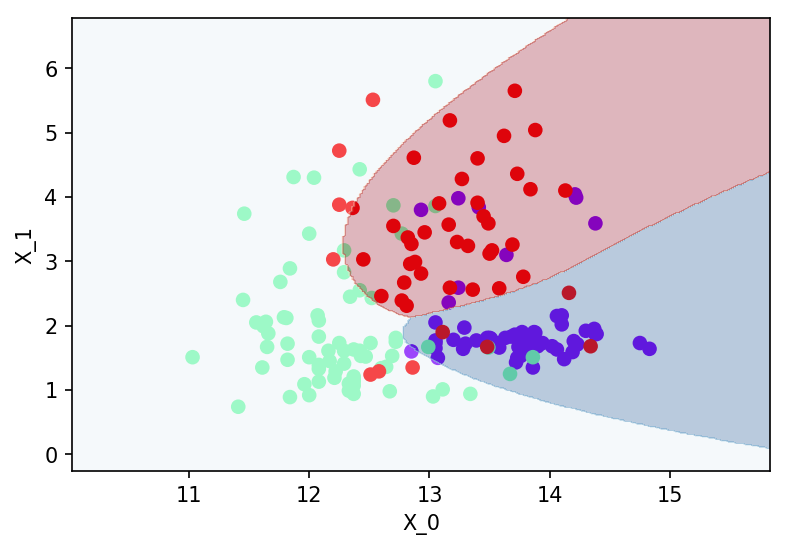

In [83]:
ax = scatter_plot(X,y)
plot_contours(ax, model, X[:,:2], y, cmap=plt.cm.RdBu_r, alpha=0.3);

### What happens if I switch to all ReLu activations?

In [84]:
model = Sequential()
model.add(Dense(36, input_dim=2, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train[:,:2], y_train_t, epochs=150, batch_size=10)

Epoch 1/150
124/124 [==============================] - 0s - loss: 1.2184 - acc: 0.3226     
Epoch 2/150
124/124 [==============================] - 0s - loss: 1.0617 - acc: 0.4194     
Epoch 3/150
124/124 [==============================] - 0s - loss: 1.0488 - acc: 0.3629     
Epoch 4/150
124/124 [==============================] - 0s - loss: 1.0374 - acc: 0.4435     
Epoch 5/150
124/124 [==============================] - 0s - loss: 1.0273 - acc: 0.4839     
Epoch 6/150
124/124 [==============================] - 0s - loss: 1.0176 - acc: 0.4032     
Epoch 7/150
124/124 [==============================] - 0s - loss: 1.0098 - acc: 0.4032     
Epoch 8/150
124/124 [==============================] - 0s - loss: 0.9953 - acc: 0.4516     
Epoch 9/150
124/124 [==============================] - 0s - loss: 0.9930 - acc: 0.4194     - ETA: 0s - loss: 0.9874 - acc: 0.444
Epoch 10/150
124/124 [==============================] - 0s - loss: 0.9888 - acc: 0.4839     
Epoch 11/150
124/124 [====================

102720/102723 [============================>.] - ETA: 0s

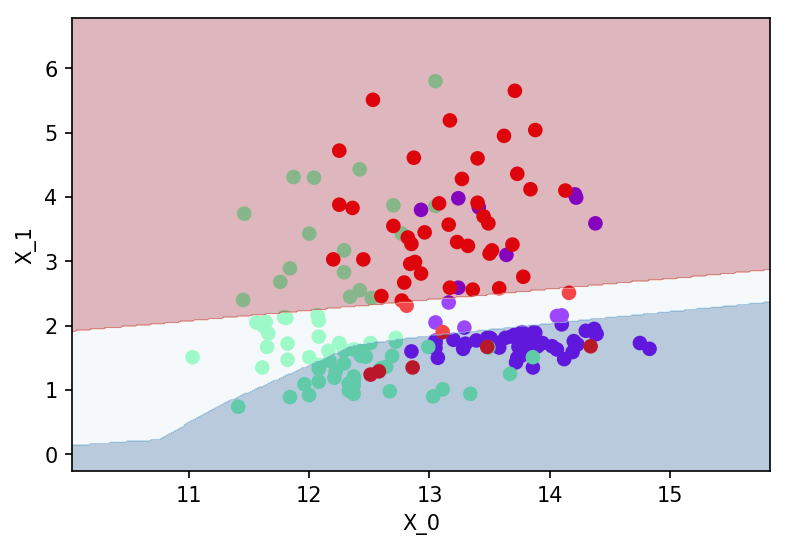

In [85]:
ax = scatter_plot(X,y)
plot_contours(ax, model, X[:,:2], y, cmap=plt.cm.RdBu_r, alpha=0.3);

### A mix?

In [88]:
model = Sequential()
model.add(Dense(36, input_dim=2, activation='relu'))
model.add(Dense(48, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train[:,:2], y_train_t, epochs=150, batch_size=10)

Epoch 1/150
124/124 [==============================] - 0s - loss: 1.1966 - acc: 0.2823     
Epoch 2/150
124/124 [==============================] - 0s - loss: 1.0537 - acc: 0.4919     
Epoch 3/150
124/124 [==============================] - 0s - loss: 1.0497 - acc: 0.4597     
Epoch 4/150
124/124 [==============================] - 0s - loss: 1.0134 - acc: 0.4597     
Epoch 5/150
124/124 [==============================] - 0s - loss: 1.0148 - acc: 0.5000     
Epoch 6/150
124/124 [==============================] - 0s - loss: 0.9824 - acc: 0.5323     
Epoch 7/150
124/124 [==============================] - 0s - loss: 0.9706 - acc: 0.5887     
Epoch 8/150
124/124 [==============================] - 0s - loss: 0.9604 - acc: 0.5081     
Epoch 9/150
124/124 [==============================] - 0s - loss: 0.9511 - acc: 0.5968     
Epoch 10/150
124/124 [==============================] - 0s - loss: 0.9383 - acc: 0.5806     
Epoch 11/150
124/124 [==============================] - 0s - loss: 0.9339 - acc

100416/102723 [============================>.] - ETA: 0s

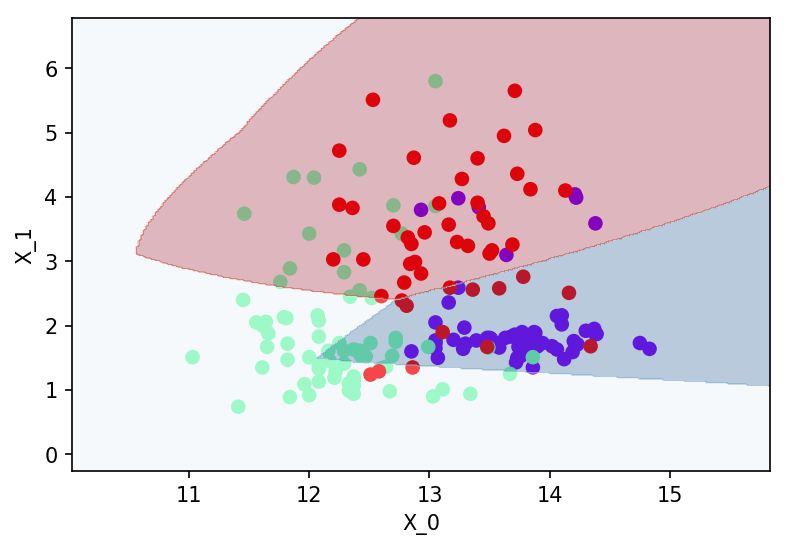

In [89]:
ax = scatter_plot(X,y)
plot_contours(ax, model, X[:,:2], y, cmap=plt.cm.RdBu_r, alpha=0.3);

### Sigmoids?

In [90]:
model = Sequential()
model.add(Dense(36, input_dim=2, activation='sigmoid'))
model.add(Dense(48, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train[:,:2], y_train_t, epochs=150, batch_size=10)

Epoch 1/150
124/124 [==============================] - 0s - loss: 1.2066 - acc: 0.2742     
Epoch 2/150
124/124 [==============================] - 0s - loss: 1.1378 - acc: 0.2742     
Epoch 3/150
124/124 [==============================] - 0s - loss: 1.1044 - acc: 0.3790     
Epoch 4/150
124/124 [==============================] - 0s - loss: 1.0936 - acc: 0.4032     
Epoch 5/150
124/124 [==============================] - 0s - loss: 1.0939 - acc: 0.4032     
Epoch 6/150
124/124 [==============================] - 0s - loss: 1.0874 - acc: 0.4032     
Epoch 7/150
124/124 [==============================] - 0s - loss: 1.0857 - acc: 0.4032     
Epoch 8/150
124/124 [==============================] - 0s - loss: 1.0855 - acc: 0.4032     
Epoch 9/150
124/124 [==============================] - 0s - loss: 1.0850 - acc: 0.4032     
Epoch 10/150
124/124 [==============================] - 0s - loss: 1.0851 - acc: 0.4032     
Epoch 11/150
124/124 [==============================] - 0s - loss: 1.0846 - acc

102336/102723 [============================>.] - ETA: 0s

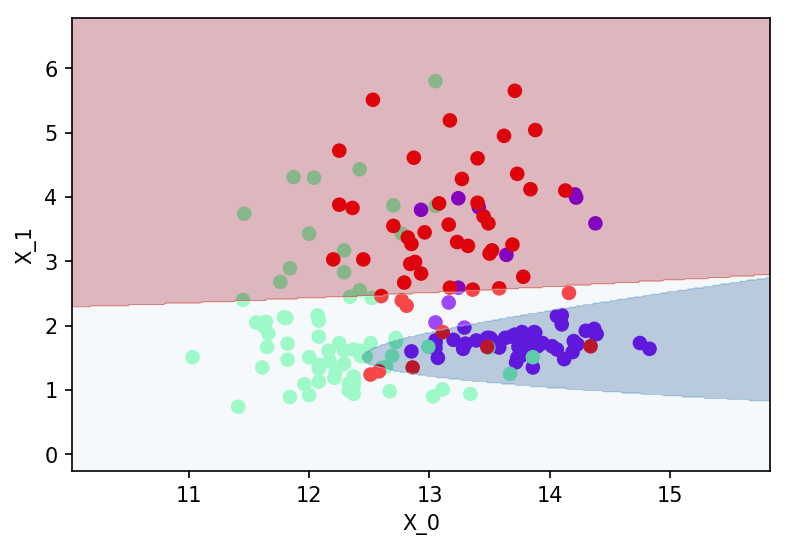

In [91]:
ax = scatter_plot(X,y)
plot_contours(ax, model, X[:,:2], y, cmap=plt.cm.RdBu_r, alpha=0.3);

### Now let's see if we can get a stronger model overall

In [79]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(36, input_dim=13, activation='tanh'))
model.add(Dense(48, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train_t, epochs=200, batch_size=10)

Epoch 1/200
124/124 [==============================] - 0s - loss: 1.1220 - acc: 0.3871     
Epoch 2/200
124/124 [==============================] - 0s - loss: 0.9180 - acc: 0.6290     
Epoch 3/200
124/124 [==============================] - 0s - loss: 0.8339 - acc: 0.6290     
Epoch 4/200
124/124 [==============================] - 0s - loss: 0.7723 - acc: 0.6290     
Epoch 5/200
124/124 [==============================] - 0s - loss: 0.7572 - acc: 0.6129     
Epoch 6/200
124/124 [==============================] - 0s - loss: 0.7101 - acc: 0.6613     
Epoch 7/200
124/124 [==============================] - 0s - loss: 0.7147 - acc: 0.6613     
Epoch 8/200
124/124 [==============================] - 0s - loss: 0.6749 - acc: 0.6613     
Epoch 9/200
124/124 [==============================] - 0s - loss: 0.6571 - acc: 0.6774     
Epoch 10/200
124/124 [==============================] - 0s - loss: 0.6486 - acc: 0.6774     
Epoch 11/200
124/124 [==============================] - 0s - loss: 0.6563 - acc

124/124 [==============================] - 0s - loss: 0.2099 - acc: 0.9113     
Epoch 176/200
124/124 [==============================] - 0s - loss: 0.2023 - acc: 0.8952     
Epoch 177/200
124/124 [==============================] - 0s - loss: 0.2215 - acc: 0.9032     
Epoch 178/200
124/124 [==============================] - 0s - loss: 0.2428 - acc: 0.8952     
Epoch 179/200
124/124 [==============================] - 0s - loss: 0.2410 - acc: 0.8952     
Epoch 180/200
124/124 [==============================] - 0s - loss: 0.2183 - acc: 0.9113     
Epoch 181/200
124/124 [==============================] - 0s - loss: 0.2348 - acc: 0.9032     
Epoch 182/200
124/124 [==============================] - 0s - loss: 0.2153 - acc: 0.9113     
Epoch 183/200
124/124 [==============================] - 0s - loss: 0.3074 - acc: 0.8710     
Epoch 184/200
124/124 [==============================] - 0s - loss: 0.2936 - acc: 0.9113     
Epoch 185/200
124/124 [==============================] - 0s - loss: 0.2785

In [80]:
evaluation = model.evaluate(X_test, y_test_t)
print("\nLoss on Test = %.3f, Accuracy on Test = %.3f"%(evaluation[0], evaluation[1]))

32/54 [================>.............] - ETA: 0s
Loss on Test = 0.135, Accuracy on Test = 0.981


# Regression Example

In [93]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [6]:
model = Sequential()
model.add(Dense(12, input_shape=(13,), activation='relu'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

In [11]:
model.fit(x_train, y_train, epochs=200, batch_size=100)

Epoch 1/200
404/404 [==============================] - 0s - loss: 28.3494 - mean_squared_error: 28.3494 - mean_absolute_error: 3.6610     
Epoch 2/200
404/404 [==============================] - 0s - loss: 29.9568 - mean_squared_error: 29.9568 - mean_absolute_error: 3.5829     
Epoch 3/200
404/404 [==============================] - 0s - loss: 27.8861 - mean_squared_error: 27.8861 - mean_absolute_error: 3.5980     
Epoch 4/200
404/404 [==============================] - 0s - loss: 28.3328 - mean_squared_error: 28.3328 - mean_absolute_error: 3.6816     
Epoch 5/200
404/404 [==============================] - 0s - loss: 27.0738 - mean_squared_error: 27.0738 - mean_absolute_error: 3.4860     
Epoch 6/200
404/404 [==============================] - 0s - loss: 27.0197 - mean_squared_error: 27.0197 - mean_absolute_error: 3.4758     
Epoch 7/200
404/404 [==============================] - 0s - loss: 26.4462 - mean_squared_error: 26.4462 - mean_absolute_error: 3.4271     
Epoch 8/200
404/404 [======

404/404 [==============================] - 0s - loss: 19.4680 - mean_squared_error: 19.4680 - mean_absolute_error: 3.1674     
Epoch 117/200
404/404 [==============================] - 0s - loss: 19.0660 - mean_squared_error: 19.0660 - mean_absolute_error: 3.1367     
Epoch 118/200
404/404 [==============================] - 0s - loss: 18.4978 - mean_squared_error: 18.4978 - mean_absolute_error: 3.0951     
Epoch 119/200
404/404 [==============================] - 0s - loss: 19.3408 - mean_squared_error: 19.3408 - mean_absolute_error: 3.1912     
Epoch 120/200
404/404 [==============================] - 0s - loss: 19.1472 - mean_squared_error: 19.1472 - mean_absolute_error: 3.1892     
Epoch 121/200
404/404 [==============================] - 0s - loss: 20.0886 - mean_squared_error: 20.0886 - mean_absolute_error: 3.1606     
Epoch 122/200
404/404 [==============================] - 0s - loss: 19.0036 - mean_squared_error: 19.0036 - mean_absolute_error: 3.0976     
Epoch 123/200
404/404 [====

In [15]:
model.fit(x_train, y_train, epochs=500, batch_size=10, verbose=0)

In [16]:
preds = model.predict(x_test)

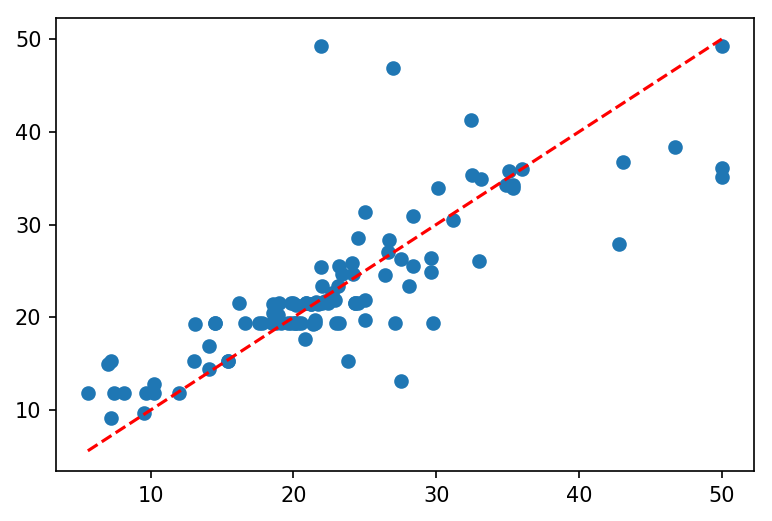

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=150)
plt.scatter(y_test, preds)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'r--')

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("MAE: ", mean_absolute_error(y_test, preds))

RMSE:  5.56114188762
MAE:  3.43289828581


### Tanh worked well above, what if I just use tanh?

In [99]:
def custom_metric(y_true, y_pred):
    resid = y_true-y_pred
    sq_resid = resid**2
    sum_square_errors = np.sum(sq_resid)
    return sum_square_errors

model = Sequential()
model.add(Dense(24, input_shape=(13,), activation='tanh'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss=custom_metric, optimizer='adam', metrics=[custom_metric])
model.fit(x_train, y_train, epochs=400, batch_size=20)

Epoch 1/400
404/404 [==============================] - 0s - loss: 487.3641 - custom_metric: 487.3641     
Epoch 2/400
404/404 [==============================] - 0s - loss: 443.9420 - custom_metric: 443.9420     
Epoch 3/400
404/404 [==============================] - 0s - loss: 425.0863 - custom_metric: 425.0863     
Epoch 4/400
404/404 [==============================] - 0s - loss: 411.7955 - custom_metric: 411.7955     
Epoch 5/400
404/404 [==============================] - 0s - loss: 400.2673 - custom_metric: 400.2673     
Epoch 6/400
404/404 [==============================] - 0s - loss: 389.7517 - custom_metric: 389.7517     
Epoch 7/400
404/404 [==============================] - 0s - loss: 379.7189 - custom_metric: 379.7189     
Epoch 8/400
404/404 [==============================] - 0s - loss: 370.0414 - custom_metric: 370.0414     
Epoch 9/400
404/404 [==============================] - 0s - loss: 361.0244 - custom_metric: 361.0244     
Epoch 10/400
404/404 [========================

404/404 [==============================] - 0s - loss: 63.7604 - custom_metric: 63.7604     
Epoch 153/400
404/404 [==============================] - 0s - loss: 63.1851 - custom_metric: 63.1851     
Epoch 154/400
404/404 [==============================] - 0s - loss: 63.8222 - custom_metric: 63.8222     
Epoch 155/400
404/404 [==============================] - 0s - loss: 62.9903 - custom_metric: 62.9903     
Epoch 156/400
404/404 [==============================] - 0s - loss: 62.7540 - custom_metric: 62.7540     
Epoch 157/400
404/404 [==============================] - 0s - loss: 62.7409 - custom_metric: 62.7409     
Epoch 158/400
404/404 [==============================] - 0s - loss: 62.5224 - custom_metric: 62.5224     
Epoch 159/400
404/404 [==============================] - 0s - loss: 62.4746 - custom_metric: 62.4746     
Epoch 160/400
404/404 [==============================] - 0s - loss: 62.3032 - custom_metric: 62.3032     
Epoch 161/400
404/404 [==============================] - 0s 

404/404 [==============================] - 0s - loss: 59.4964 - custom_metric: 59.4964     
Epoch 305/400
404/404 [==============================] - 0s - loss: 59.3312 - custom_metric: 59.3312     
Epoch 306/400
404/404 [==============================] - 0s - loss: 59.0809 - custom_metric: 59.0809     
Epoch 307/400
404/404 [==============================] - 0s - loss: 59.1019 - custom_metric: 59.1019      
Epoch 308/400
404/404 [==============================] - 0s - loss: 59.8424 - custom_metric: 59.8424     
Epoch 309/400
404/404 [==============================] - 0s - loss: 59.5784 - custom_metric: 59.5784     
Epoch 310/400
404/404 [==============================] - 0s - loss: 59.0741 - custom_metric: 59.0741     
Epoch 311/400
404/404 [==============================] - 0s - loss: 59.4725 - custom_metric: 59.4725     
Epoch 312/400
404/404 [==============================] - 0s - loss: 59.2814 - custom_metric: 59.2814     
Epoch 313/400
404/404 [==============================] - 0s

RMSE:  7.54469966341
MAE:  5.62055821138


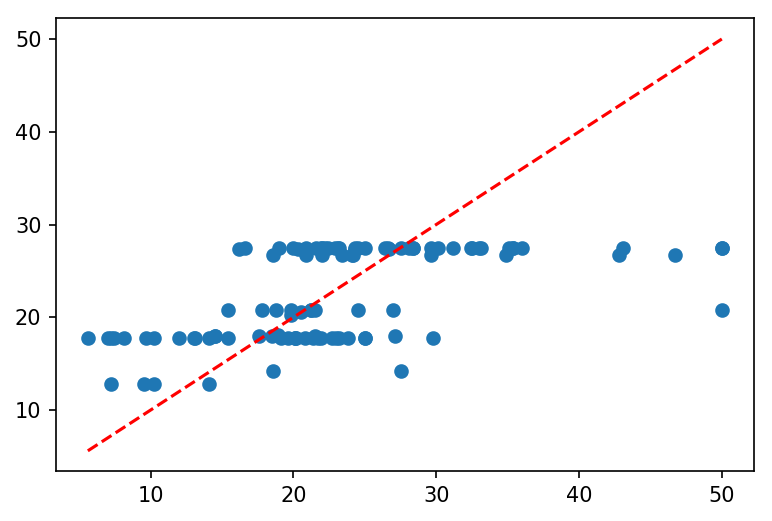

In [101]:
preds = model.predict(x_test)

plt.figure(dpi=150)
plt.scatter(y_test, preds)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'r--')

print("RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("MAE: ", mean_absolute_error(y_test, preds))